In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [2]:
tesla = pd.read_csv(r"C:\Users\rhari\Downloads\tesla_stocks.csv")
tesla.head()

,Date,Open,High,Low,Close,Volume
0,2-Aug-17,318.94,327.12,311.22,325.89,13091462
1,1-Aug-17,323.00,324.45,316.13,319.57,8303102
2,31-Jul-17,335.50,341.49,321.04,323.47,8535136
3,28-Jul-17,336.89,339.60,332.51,335.07,4880414
4,27-Jul-17,346.00,347.50,326.29,334.46,8302405


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    756 non-null    object 
 1   Open    756 non-null    float64
 2   High    756 non-null    float64
 3   Low     756 non-null    float64
 4   Close   756 non-null    float64
 5   Volume  756 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 35.6+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\rhari\AppData\Local\Temp\ipykernel_6504\3702129700.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2014-08-04 00:00:00 2017-08-02 00:00:00
Total days = 1094 days


In [6]:
tesla.describe()

,Date,Open,High,Low,Close,Volume
count,756,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,2016-02-01 10:07:37.142856960,238.501997,242.079286,234.626177,238.476759,5.090132e+06
min,2014-08-04 00:00:00,142.320000,154.970000,141.050000,143.670000,7.102770e+05
25%,2015-05-04 18:00:00,208.987500,212.560000,205.767500,208.712500,3.304122e+06
50%,2016-02-02 12:00:00,230.455000,234.450000,226.665000,230.260000,4.368873e+06
75%,2016-10-31 06:00:00,255.382500,258.992500,251.695000,255.530000,6.087274e+06
max,2017-08-02 00:00:00,386.690000,386.990000,379.340000,383.450000,2.374241e+07
std,NaN,41.847814,41.989773,41.248406,41.719167,2.753492e+06


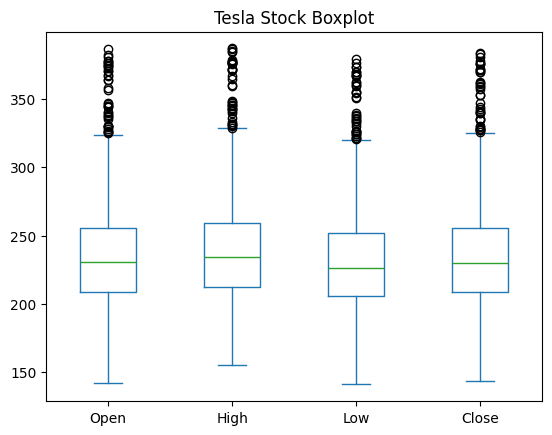

In [7]:
ax = tesla[['Open', 'High', 'Low', 'Close']].plot(kind='box')
plt.title("Tesla Stock Boxplot")
plt.show()

In [8]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [9]:
print(type(plot))





<class 'plotly.graph_objs._figure.Figure'>


In [10]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [12]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [14]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [15]:
print(type(plot2))


<class 'plotly.graph_objs._figure.Figure'>


In [16]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.08812514052136922	0.15309064463969047
MSE       1523.6682630555722	1597.845115443433

